# Pymaceuticals Inc.
---

### Analysis

- The tumor volume for mouse b128 decreased in size while trying Capomulin regimen
- Capomulin and Ramiance had higher number of observed mouse timepoints
- Mouse weight and tummor volume have a positive correlation
- Capomulin and Ramiance had the biggest dicrease in tumor volume compare to Imfubinol and Ketapril
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:/Users/manen/Desktop/Challenge05/Pymaceuticals-Challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/manen/Desktop/Challenge05/Pymaceuticals-Challenge/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#For me to see the data
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single DataFrame

combined_data_df=pd.merge(study_results,mouse_metadata, how ='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.

mice_count=len(combined_data_df['Mouse ID'].unique())

mice_count


249

In [7]:

# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mice = duplicate_rows['Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(duplicate_mice)


['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data= combined_data_df.loc[combined_data_df['Mouse ID'] == 'g989']

g989_data.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']

clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.

mice_second_count = len(clean_data_df['Mouse ID'].unique())

mice_second_count

248

In [11]:
#checking if my data was correctly grouped 

clean_data_df['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).mean()
median = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).median()
var = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).var()
std = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).std()
sem = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).sem()

summary= pd.DataFrame({"Mean Tumor Volume":mean, 
                        "Median Tumor Volume":median, 
                        "Tumor Volume Variance":var, 
                        "Tumor Volume Std. Dev.":std, 
                        "Tumor Volume Std. Err.":sem})

summary.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
summary_2nd =  clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_2nd

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

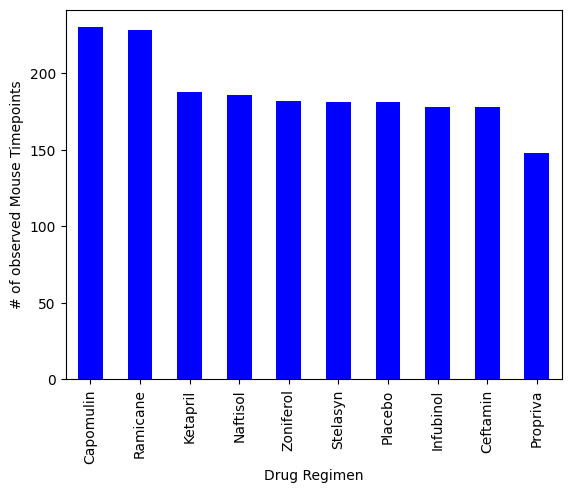

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_data_df['Drug Regimen'].value_counts()

plot_pandas= regimen_counts.plot.bar(color='b')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

plt.show()


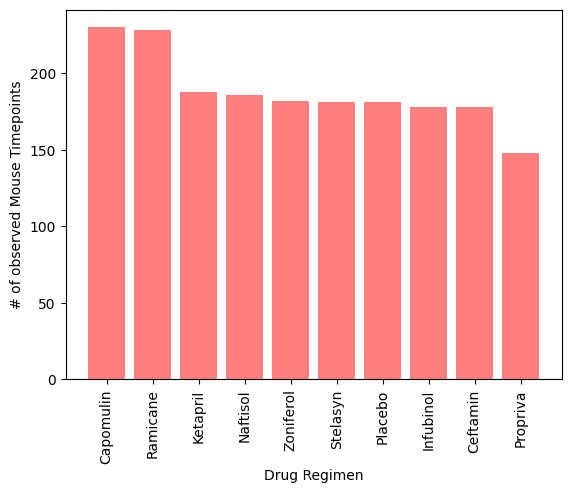

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = regimen_counts.index.values
y_axis = regimen_counts.values

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation="vertical")

plt.show()


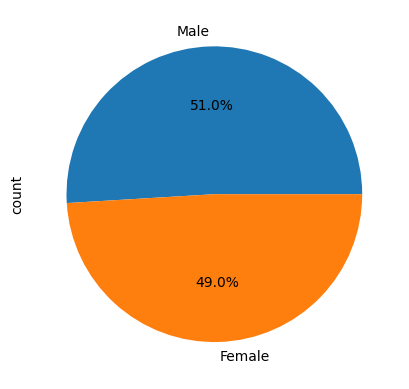

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_data=clean_data_df['Sex'].value_counts()

#for me to validate correct count
#print (pie_data)

plot_pandas= pie_data.plot.pie(autopct= "%1.1f%%")
plt.show()

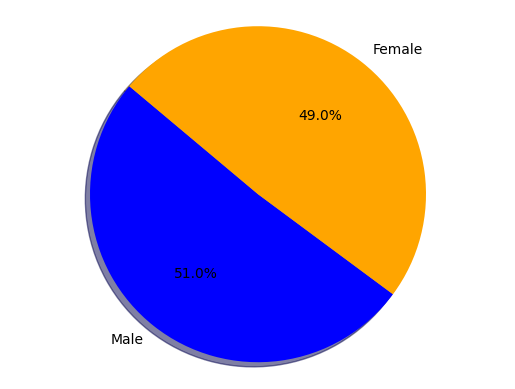

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = pie_data.index
sizes = pie_data.values
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
#For me to check data again

clean_data_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

capomulin_data=clean_data_df.loc[clean_data_df['Drug Regimen'] =="Capomulin"]
ramicane_data=clean_data_df.loc[clean_data_df['Drug Regimen'] =="Ramicane"]
infubinol_data=clean_data_df.loc[clean_data_df['Drug Regimen'] =="Infubinol"]
ceftamin_data=clean_data_df.loc[clean_data_df['Drug Regimen'] =="Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse

capomulin_greatest = capomulin_data.groupby('Mouse ID')['Timepoint'].max()
ramicane_greatest = ramicane_data.groupby('Mouse ID')['Timepoint'].max()
infubinol_greatest = infubinol_data.groupby('Mouse ID')['Timepoint'].max()
ceftamin_greatest = ceftamin_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_final_volume = pd.merge(capomulin_greatest, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
ramicane_final_volume = pd.merge(ramicane_greatest, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
infubinol_final_volume = pd.merge(infubinol_greatest, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
ceftamin_final_volume = pd.merge(ceftamin_greatest, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']



In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#capomulin
quartiles = capomulin_final_volume.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
lower_bound_capomulin = lower_quartile - 1.5 * iqr
upper_bound_capomulin = upper_quartile + 1.5 * iqr
    
#Ramiance
    
quartiles = ramicane_final_volume.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
lower_bound_ramiance = lower_quartile - 1.5 * iqr
upper_bound_ramiance = upper_quartile + 1.5 * iqr
    
#Infubinol
quartiles = infubinol_final_volume.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
lower_bound_infubinol = lower_quartile - 1.5 * iqr
upper_bound_infubinol = upper_quartile + 1.5 * iqr

#Ceftamin
quartiles = ceftamin_final_volume.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
lower_bound_ceftamin = lower_quartile - 1.5 * iqr
upper_bound_ceftamin = upper_quartile + 1.5 * iqr

    
print(f"Potential outliers Capomulin Values below {lower_bound_capomulin} could be outliers.")
print(f"Potential outliers CapomulinValues above {upper_bound_capomulin} could be outliers.")
print()
print(f"Potential outliers Ramiance Values below {lower_bound_ramiance} could be outliers.")
print(f"Potential outliers Ramiance Values above {upper_bound_ramiance} could be outliers.")
print()
print(f"Potential outliers Infubinol Values below {lower_bound_infubinol} could be outliers.")
print(f"Potential outliers Infubinol Values above {upper_bound_infubinol} could be outliers.")
print()
print(f"Potential outliers Ceftamin Values below {lower_bound_ceftamin} could be outliers.")
print(f"Potential outliers Ceftamin Values above {upper_bound_ceftamin} could be outliers.")
print()



Potential outliers Capomulin Values below 20.70456164999999 could be outliers.
Potential outliers CapomulinValues above 51.83201549 could be outliers.

Potential outliers Ramiance Values below 17.912664470000003 could be outliers.
Potential outliers Ramiance Values above 54.30681135 could be outliers.

Potential outliers Infubinol Values below 36.83290494999999 could be outliers.
Potential outliers Infubinol Values above 82.74144559000001 could be outliers.

Potential outliers Ceftamin Values below 25.355449580000002 could be outliers.
Potential outliers Ceftamin Values above 87.66645829999999 could be outliers.



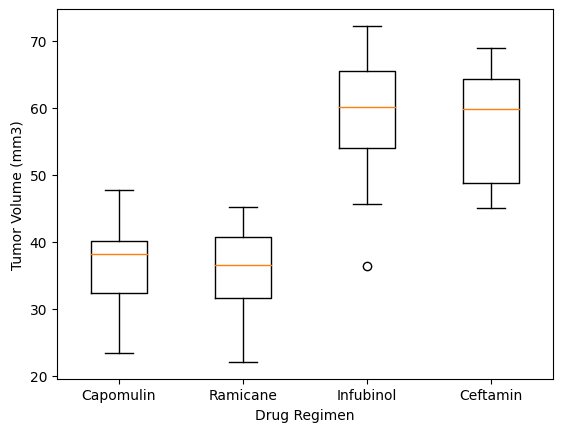

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [
    capomulin_final_volume,
    ramicane_final_volume,
    infubinol_final_volume,
    ceftamin_final_volume
]


fig, ax = plt.subplots()


ax.boxplot(tumor_volume_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')


plt.show()



## Line and Scatter Plots

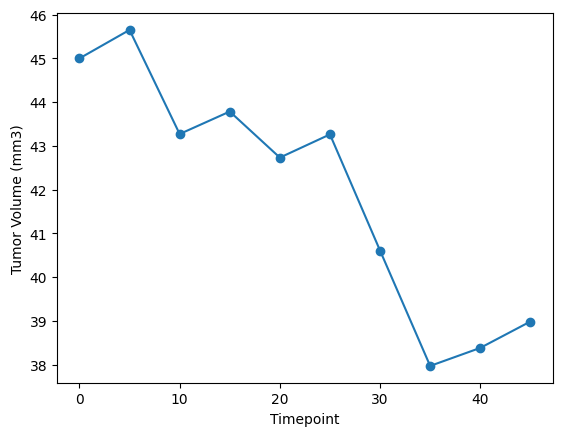

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin:
# my choice mouse b128

mouse_choice='b128'

mouse_data = clean_data_df.loc[(clean_data_df['Mouse ID'] == mouse_choice) & (clean_data_df['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


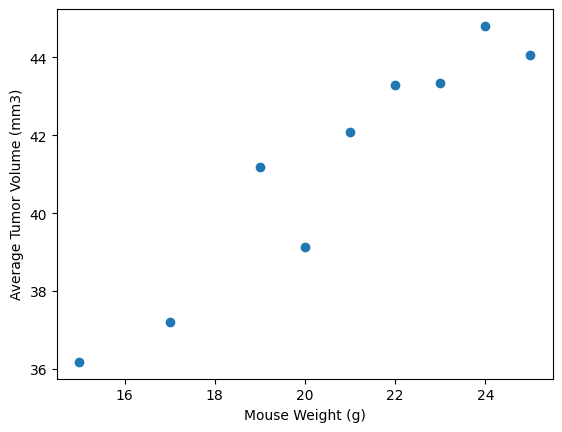

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

x = average_tumor_volume.index
y = average_tumor_volume.values

plt.scatter(x, y)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [24]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is: PearsonRResult(statistic=0.9505243961855266, pvalue=8.449451040646364e-05)


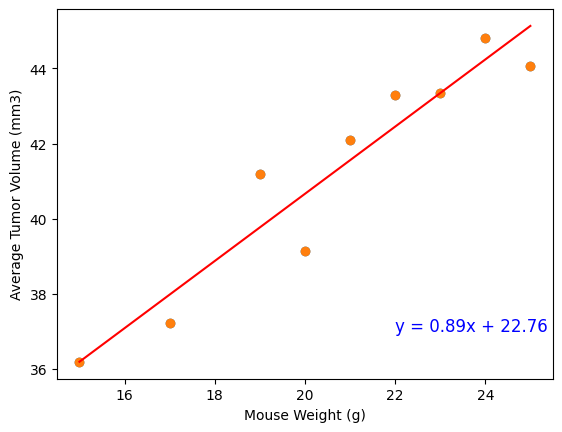

In [25]:
# Calculate the correlation coefficient and a linear regression model 

capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
x_values = average_tumor_volume.index
y_values = average_tumor_volume.values

correlation= st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
                          
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.scatter(x, y)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (22, 37), fontsize=12, color="blue")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()